## ЛР 3
Предобработка и визуализация больших данных

[источник набора данных](https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-2021/data)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/input_data.csv", sep=";")
df.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-01-01,2451300,15,31,1,30.3,0.0,56.780112,60.699355,0,2,620000.0,NaN,66,1632918.0
1,2021-01-01,1450000,5,5,1,33.0,6.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
2,2021-01-01,10700000,4,13,3,85.0,12.0,55.540060,37.725112,3,0,142701.0,242543.0,50,681306.0
3,2021-01-01,3100000,3,5,3,82.0,9.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
4,2021-01-01,2500000,2,3,1,30.0,9.0,44.738685,37.713668,3,2,353960.0,439378.0,23,1730985.0


In [3]:
df.shape

(11358150, 15)

### Описание данных

- date - дата публикации объявления;
- price - цена в рублях;
- level - этаж квартиры;
- levels - количество этажей в доме;
- rooms - количество жилых комнат (если значение равно "-1", то это означает "квартира-студия");
- area - общая площадь квартиры;
- kitchen_area - площадь кухни;
- geo_lat - широта;
- geo_lon - долгота;
- building_type - тип фасада (0 - не знаю; 1 - другое; 2 - панельный; 3 - монолитный; 4 - кирпичный; 5 - блочный; 6 - деревянный);
- object_type - тип квартиры (0 - вторичный рынок недвижимости; 2 - новостройка);
- postal_code - почтовый индекс;
- street_id - идентификатор улицы;
- id_region - номер региона в России (всего 85 субъектов);
- house_id - идентификатор дома.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11358150 entries, 0 to 11358149
Data columns (total 15 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   price          int64  
 2   level          int64  
 3   levels         int64  
 4   rooms          int64  
 5   area           float64
 6   kitchen_area   float64
 7   geo_lat        float64
 8   geo_lon        float64
 9   building_type  int64  
 10  object_type    int64  
 11  postal_code    float64
 12  street_id      float64
 13  id_region      int64  
 14  house_id       float64
dtypes: float64(7), int64(7), object(1)
memory usage: 1.3+ GB


In [5]:
pd.set_option("display.float_format", lambda x: "%.3f" %x)
df.describe()

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
count,11358150.000,11358150.000,11358150.000,11358150.000,11358150.000,11358150.000,11358150.000,11358150.000,11358150.000,11358150.000,10850379.000,7152596.000,11358150.000,8096207.000
mean,6787516.415,6.427,11.763,1.719,53.104,-2.674,54.404,52.296,1.018,0.528,403171.659,352562.329,51.255,1703792.313
std,197711828.430,5.283,7.218,1.158,27.128,32.419,4.583,21.839,1.562,0.881,195961.840,136648.508,22.505,640457.776
min,0.000,0.000,0.000,-1.000,1.000,-100.000,41.438,-173.219,0.000,0.000,0.000,116187.000,1.000,588606.000
25%,2600000.000,2.000,5.000,1.000,36.500,0.000,53.194,37.638,0.000,0.000,196158.000,233915.000,31.000,1162465.000
50%,3995000.000,5.000,10.000,2.000,46.700,6.500,55.647,42.021,0.000,0.000,400007.000,350222.000,54.000,1703143.000
75%,6500000.000,9.000,17.000,2.000,63.000,10.500,56.874,65.473,2.000,2.000,625007.000,470537.000,72.000,2255297.000
max,635552400000.000,50.000,50.000,9.000,499.900,408.000,73.509,179.258,6.000,2.000,862163.000,588597.000,200.000,2839173.000


In [6]:
df.isna().sum()

date                   0
price                  0
level                  0
levels                 0
rooms                  0
area                   0
kitchen_area           0
geo_lat                0
geo_lon                0
building_type          0
object_type            0
postal_code       507771
street_id        4205554
id_region              0
house_id         3261943
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(396685)

### Очистка данных

#### Удаление пропусков

In [8]:
df.dropna(subset=["postal_code", "street_id", "house_id"], inplace=True)

#### Аномалии

In [9]:
df[df["kitchen_area"] < 0]["kitchen_area"].unique()

array([-100.,   -3.])

"kitchen_area" имеет отрицательные значения, что нелогично. Так еще и этих значений 2, если бы было только 1 значение, то можно было бы предположить, что под отрицательным значение подразумевается отсутвие кухни.

In [10]:
df.drop(df[df["kitchen_area"] < 0].index, inplace=True)

Проверка того, чтобы количество этажей в доме было больше, чем этаж квартиры. Скорее всего просто перепутали местами при заполнении.

In [11]:
df.loc[df["level"] > df["levels"], ["level", "levels"]] = df.loc[df["level"] > df["levels"], ["levels", "level"]].values

#### Удаление дубликатов

In [12]:
df.drop_duplicates(inplace=True)

#### Преобразование типов данных

In [13]:
df["date"] = pd.to_datetime(df["date"])
df["postal_code"] = df["postal_code"].astype("int64")
df["street_id"] = df["street_id"].astype("int64")
df["house_id"] = df["house_id"].astype("int64")

#### Удаление выбросов по цене

In [14]:
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

df = df[(df["price"] >= lower) & (df["price"] <= upper)]

### Визуализация данных

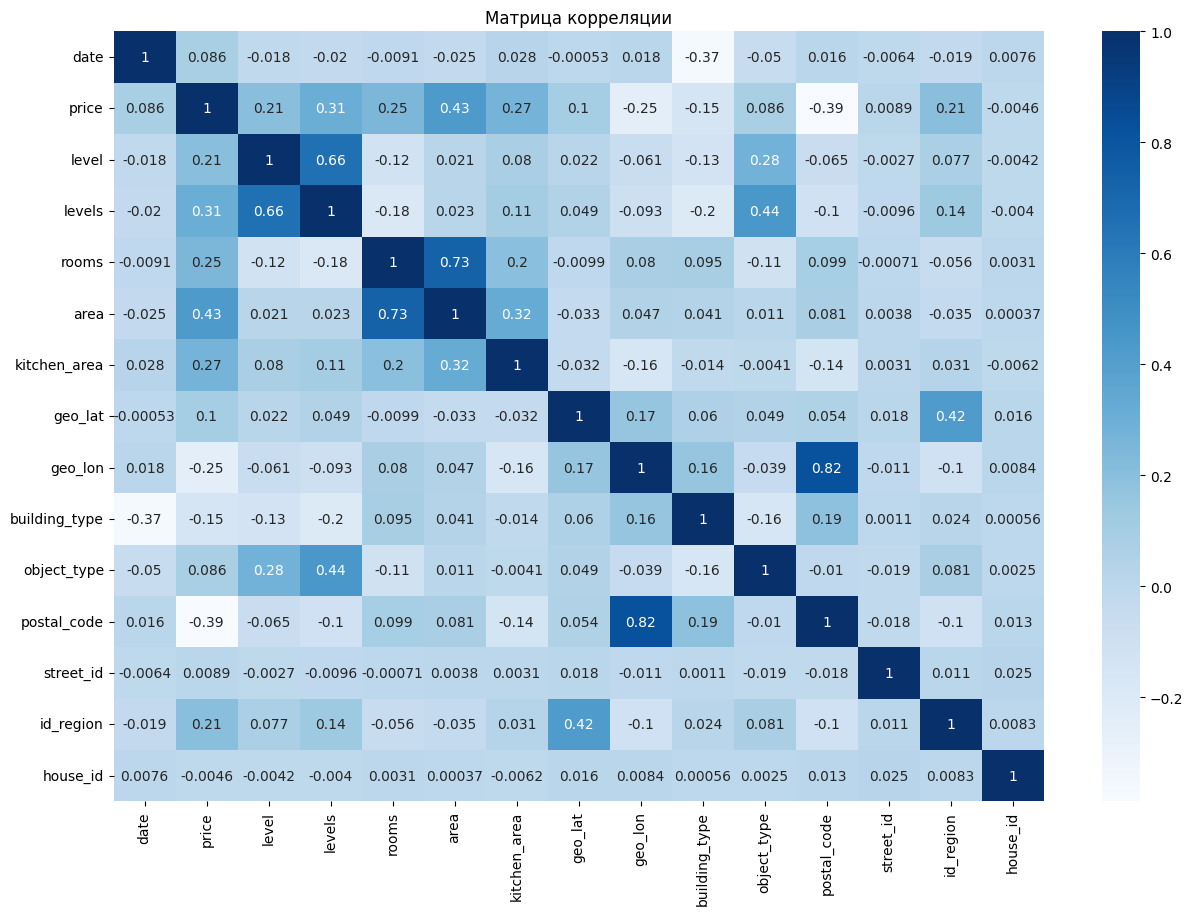

In [15]:
cor_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(cor_matrix, cmap="Blues", annot=True)
plt.title("Матрица корреляции")
plt.show()

In [16]:
threshold = 0.8
cor_features = set()

for i in range(cor_matrix.shape[0]):
    for j in range(i):
        if abs(cor_matrix.iloc[i, j]) > threshold:
            colname = cor_matrix.columns[i]
            cor_features.add(colname)
if len(cor_features) == 0:
    print("Нет признаков, которые сильно коррелируются")
else:
    print(f"Признаки, которые сильно коррелируют: {cor_features}")

Признаки, которые сильно коррелируют: {'postal_code'}


Признак "postal_code" коррелирует с "geo_lon"

In [17]:
df.drop("postal_code", axis=1, inplace=True)

#### Замена идентификатора региона на его название

In [18]:
region_name = {
    "78": "Санкт-Петербург",
    "47": "Ленинградская область", 
    "77": "Москва",
    "92": "Севастополь",
    "50": "Московская область",
    "23": "Краснодарский край",
    "52": "Нижегородская область",
    "61": "Ростовская область",
    "63": "Самарская область",
    "16": "Республика Татарстан",
    "26": "Ставропольский край",
    "2": "Республика Башкортостан",
    "66": "Свердловская область", 
    "87": "Чукоский автономный округ",
    "11": "Республика Коми", 
    "74": "Челябинская область", 
    "38": "Иркутская область", 
    "59": "Пермский край", 
    "22": "Алтайский край",
    "3": "Республика Бурятия",
    "76": "Ярославская область",
    "18": "Удмуртская Республика",
    "60": "Псковская область",
    "15": "Республика Северная Осетия — Алания",
    "42": "Кемеровская область",
    "21": "Чувашская Республика",
    "12": "Республика Марий Эл",
    "7": "Кабардино-Балкарская Республика",
    "13": "Республика Мордовия",
    "24": "Красноярский край",
    "72": "Тюменская область",
    "19": "Республика Хакасия",
    "54": "Новосибирская область",
    "36": "Воронежская область",
    "10": "Республика Карелия",
    "5": "Республика Дагестан",
    "14": "Республика Саха (Якутия)",
    "75": "Забайкальский край",
    "35": "Республика Крым",
    "43": "Кировская область",
    "8": "Республика Калмыкия",
    "1": "Республика Адыгея",
    "9": "Карачаево-Черкесская Республика",
    "17": "Республика Тыва",
    "6": "Республика Ингушетия",
    "4": "Республика Алтай",
    "31": "Белгородская область",
    "29": "Архангельская область",
    "69": "Тверская область",
    "58": "Пензенская область",
    "86": "Ханты-Мансийский автономный округ",
    "48": "Липецкая область",
    "33": "Владимирская область",
    "89": "Ямало-Ненецкий автономный округ",
    "62": "Рязанская область",
    "20" : "Чеченская Республика",
    "200": "Чеченская Республика",
    "67": "Смоленская область",
    "64": "Саратовская область",
    "35": "Вологодская область",
    "34": "Волгоградская область",
    "40": "Калужская область",
    "71": "Тульская область",
    "68": "Тамбовская область",
    "51": "Мурманская область",
    "53": "Новгородская область",
    "46": "Курская область",
    "27": "Хабаровский край",
    "32": "Брянская область",
    "30": "Астраханская область",
    "91": "Калининградская область",
    "39": "Калининградская область",
    "55": "Омская область",
    "45": "Курганская область",
    "70": "Томская область",
    "73": "Ульяновская область",
    "56": "Оренбургская область",
    "44": "Костромская область",
    "57": "Орловская область",
    "41": "Камчатский край",
    "37": "Ивановская область",
    "28": "Амурская область",
    "49": "Магаданская область",
    "79": "Еврейская автономная область",
    "25": "Приморский край",
    "65": "Сахалинская область",
    "83": "Ненецкий автономный округ"
}

In [19]:
df["id_region"] = df["id_region"].astype(str)
df["region_name"] = df["id_region"].map(region_name)

In [20]:
df.drop("id_region", axis=1, inplace=True)

#### Регионы с наибольшим количеством объявлений

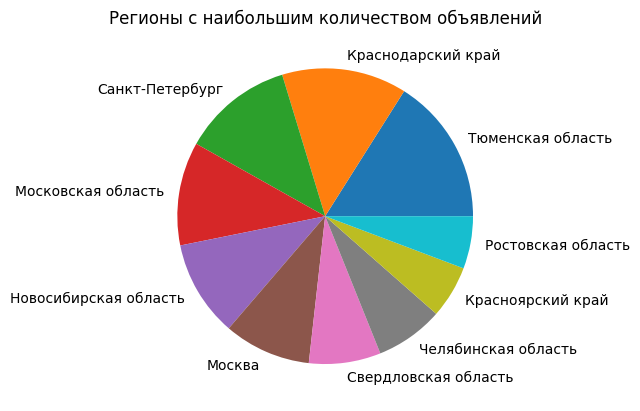

In [21]:
df["region_name"].value_counts().head(10).plot(kind="pie")
plt.title("Регионы с наибольшим количеством объявлений")
plt.ylabel("")
plt.show()

#### Средняя цена по регионам

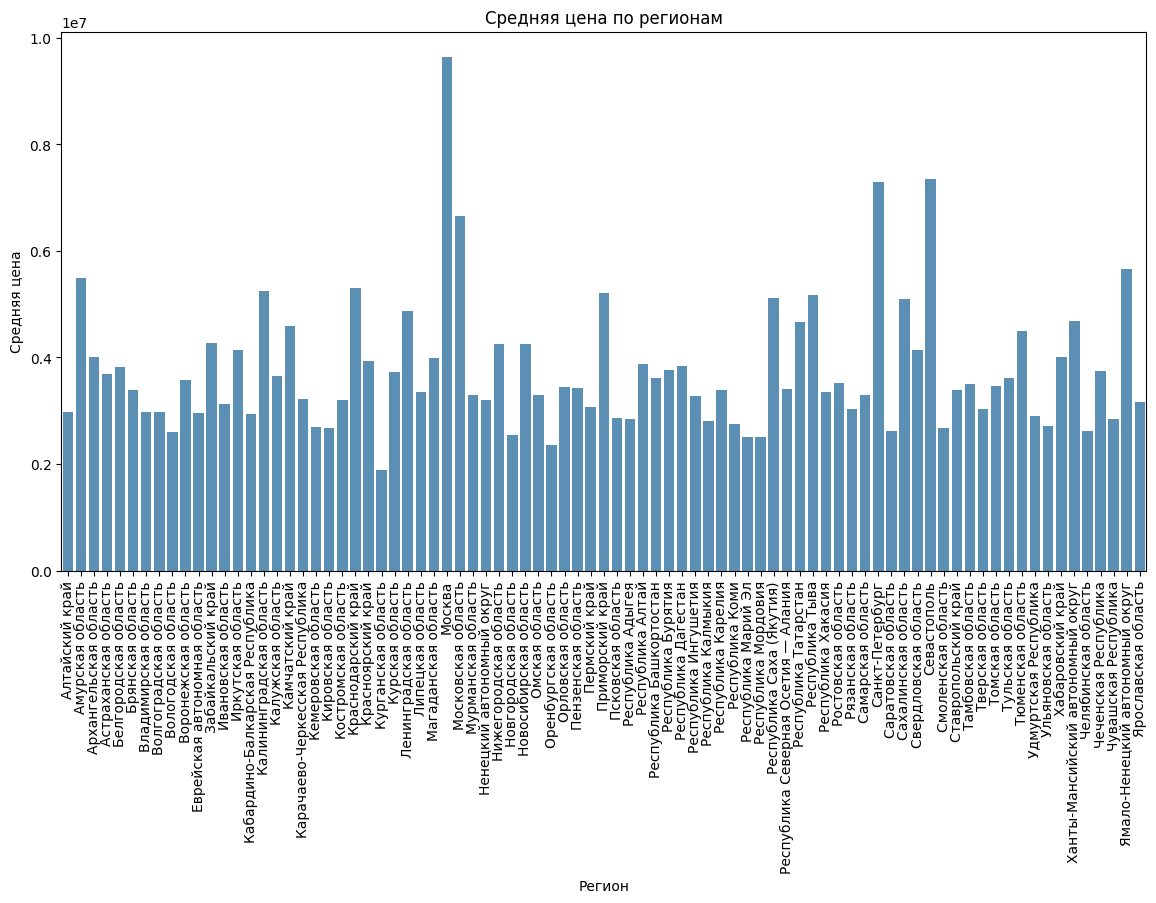

In [22]:
mean_price = df.groupby("region_name")["price"].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(x="region_name", y="price", data=mean_price, alpha=0.8)
plt.title("Средняя цена по регионам")
plt.xlabel("Регион")
plt.ylabel("Средняя цена")
plt.xticks(rotation=90)
plt.show()

In [23]:
df_moscow = df[df["region_name"] == "Москва"]

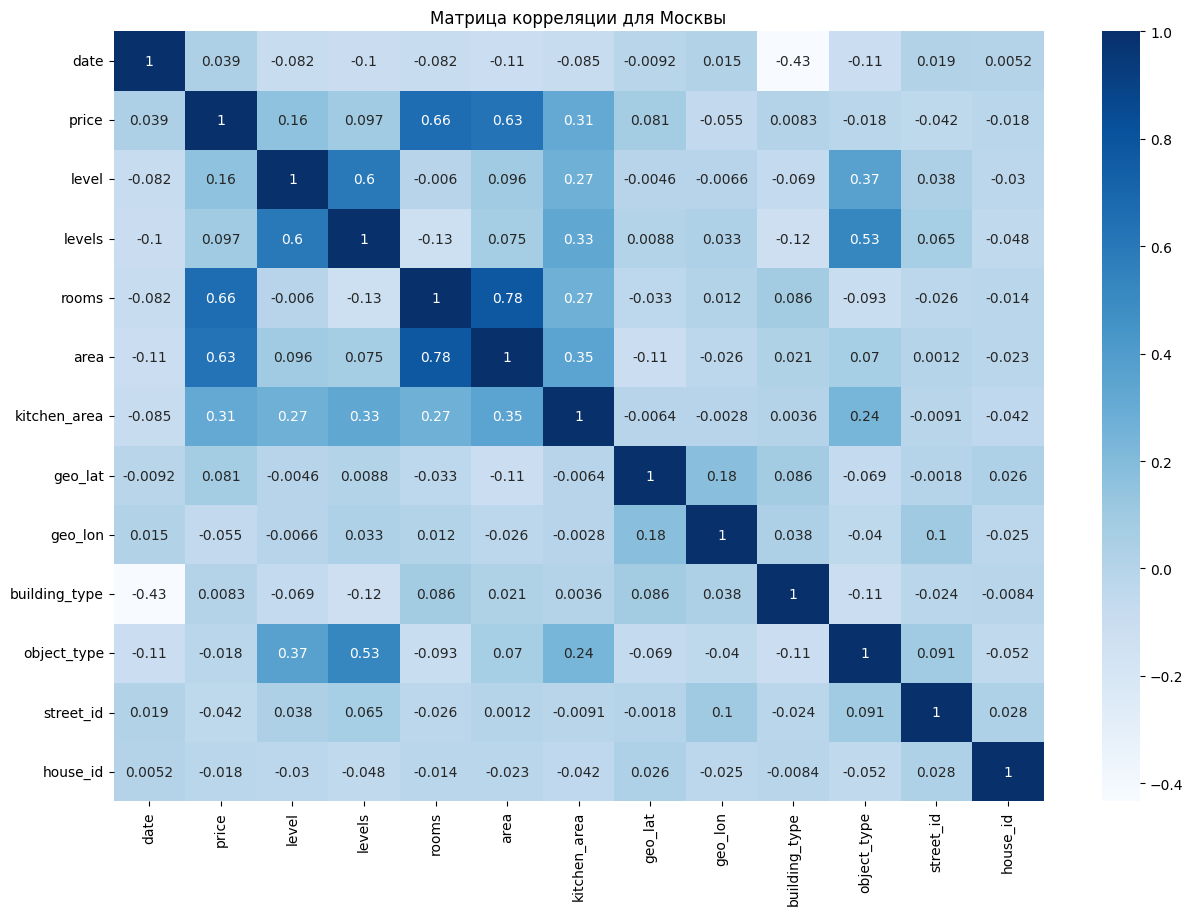

In [24]:
cor_matrix_moscow = df_moscow.drop("region_name", axis=1).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(cor_matrix_moscow, cmap="Blues", annot=True)
plt.title("Матрица корреляции для Москвы")
plt.show()

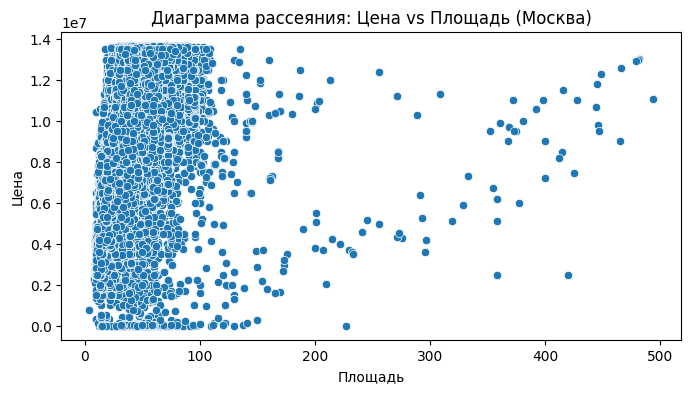

In [25]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_moscow, x="area", y="price")
plt.title("Диаграмма рассеяния: Цена vs Площадь (Москва)")
plt.xlabel("Площадь")
plt.ylabel("Цена")
plt.show()